# Regression_FFNN

## load data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
column_name = ["Sex", "Length" ,"Diameter" ,"Height" ,"WholeWeight" ,"ShuckedWeight", "VisceraWeight", "Shell weight", "Rings"]

In [3]:
data = pd.read_csv('abalone.data', names = column_name)
data.head()

,Sex,Length,Diameter,Height,WholeWeight,ShuckedWeight,VisceraWeight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [4]:
data_sex = data['Sex']
data_sex_encoded, data_sex_categories = data_sex.factorize()
data['Sex'] = data_sex_encoded

In [5]:
data.head()

,Sex,Length,Diameter,Height,WholeWeight,ShuckedWeight,VisceraWeight,Shell weight,Rings
0,0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,0,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,1,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,0,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,2,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


## data

In [6]:
X = data.copy()
y = X.pop('Rings')

In [7]:
print(X.shape, y.shape)

(4177, 8) (4177,)


## data split

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [10]:
print(f"X_train : {X_train.shape}, y_train : {y_train.shape}")
print(f"X_test : {X_test.shape}, y_test : {y_test.shape}")

X_train : (3341, 8), y_train : (3341,)
X_test : (836, 8), y_test : (836,)


# model base optimizer adam

In [11]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [22]:
model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=[8]),
    layers.Dense(32, activation='relu'),
    layers.Dense(128, activation='relu'),
#     layers.Flatten(),
    layers.Dense(1)
])

In [23]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 64)                576       
_________________________________________________________________
dense_8 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_9 (Dense)              (None, 128)               4224      
_________________________________________________________________
flatten (Flatten)            (None, 128)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 1)                 129       
Total params: 7,009
Trainable params: 7,009
Non-trainable params: 0
_________________________________________________________________


In [24]:
model.compile(optimizer='adam', loss='mse', metrics=['mae', 'mse'])

In [25]:
history = model.fit(X_train, y_train, 
                     epochs=100,
                     batch_size=128,
                     validation_data=(X_test, y_test),
                     verbose = 1
                    )

Train on 3341 samples, validate on 836 samples
Epoch 1/100
3341/3341 [==============================] - 0s 53us/sample - loss: 92.0077 - mae: 9.0512 - mse: 92.0077 - val_loss: 60.8858 - val_mae: 7.1724 - val_mse: 60.8858
Epoch 2/100
3341/3341 [==============================] - 0s 21us/sample - loss: 26.8737 - mae: 4.1087 - mse: 26.8737 - val_loss: 12.1453 - val_mae: 2.9656 - val_mse: 12.1453
Epoch 3/100
3341/3341 [==============================] - 0s 23us/sample - loss: 9.9021 - mae: 2.3779 - mse: 9.9021 - val_loss: 8.6723 - val_mae: 2.0997 - val_mse: 8.6723
Epoch 4/100
3341/3341 [==============================] - 0s 24us/sample - loss: 8.3191 - mae: 2.1464 - mse: 8.3191 - val_loss: 8.0381 - val_mae: 1.9762 - val_mse: 8.0381
Epoch 5/100
3341/3341 [==============================] - 0s 25us/sample - loss: 7.6631 - mae: 2.0217 - mse: 7.6631 - val_loss: 7.2995 - val_mae: 1.9030 - val_mse: 7.2995
Epoch 6/100
3341/3341 [==============================] - 0s 24us/sample - loss: 7.0263 - mae: 1

Epoch 48/100
3341/3341 [==============================] - 0s 15us/sample - loss: 4.5098 - mae: 1.5180 - mse: 4.5098 - val_loss: 4.7689 - val_mae: 1.5735 - val_mse: 4.7689
Epoch 49/100
3341/3341 [==============================] - 0s 20us/sample - loss: 4.4517 - mae: 1.5033 - mse: 4.4517 - val_loss: 4.6504 - val_mae: 1.4838 - val_mse: 4.6504
Epoch 50/100
3341/3341 [==============================] - 0s 41us/sample - loss: 4.4318 - mae: 1.4963 - mse: 4.4318 - val_loss: 4.6330 - val_mae: 1.4762 - val_mse: 4.6330
Epoch 51/100
3341/3341 [==============================] - 0s 39us/sample - loss: 4.4585 - mae: 1.5181 - mse: 4.4585 - val_loss: 4.8859 - val_mae: 1.4718 - val_mse: 4.8859
Epoch 52/100
3341/3341 [==============================] - 0s 38us/sample - loss: 4.6498 - mae: 1.5406 - mse: 4.6498 - val_loss: 4.7814 - val_mae: 1.4648 - val_mse: 4.7814
Epoch 53/100
3341/3341 [==============================] - 0s 35us/sample - loss: 4.5285 - mae: 1.5179 - mse: 4.5285 - val_loss: 4.6809 - val_mae:

Epoch 96/100
3341/3341 [==============================] - 0s 17us/sample - loss: 4.3701 - mae: 1.4902 - mse: 4.3701 - val_loss: 4.5670 - val_mae: 1.4822 - val_mse: 4.5670
Epoch 97/100
3341/3341 [==============================] - 0s 17us/sample - loss: 4.3851 - mae: 1.4965 - mse: 4.3851 - val_loss: 4.6141 - val_mae: 1.4587 - val_mse: 4.6141
Epoch 98/100
3341/3341 [==============================] - 0s 20us/sample - loss: 4.4510 - mae: 1.5086 - mse: 4.4510 - val_loss: 4.7521 - val_mae: 1.4602 - val_mse: 4.7521
Epoch 99/100
3341/3341 [==============================] - 0s 30us/sample - loss: 4.5322 - mae: 1.5119 - mse: 4.5322 - val_loss: 4.9212 - val_mae: 1.4802 - val_mse: 4.9212
Epoch 100/100
3341/3341 [==============================] - 0s 38us/sample - loss: 4.4615 - mae: 1.5019 - mse: 4.4615 - val_loss: 4.5430 - val_mae: 1.4745 - val_mse: 4.5430


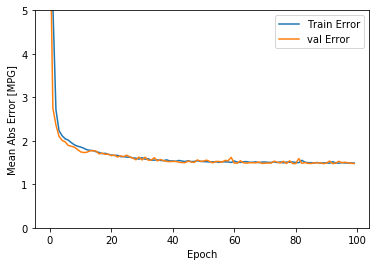

In [16]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch

plt.xlabel('Epoch')
plt.ylabel('Mean Abs Error [MPG]')
plt.plot(hist['epoch'], hist['mae'], label='Train Error')
plt.plot(hist['epoch'], hist['val_mae'], label='val Error')
plt.ylim(0, 5)
plt.legend()

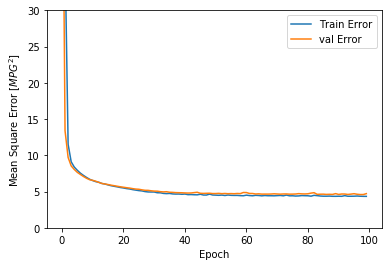

In [17]:
plt.xlabel('Epoch')
plt.ylabel('Mean Square Error [$MPG^2$]')
plt.plot(hist['epoch'], hist['mse'], label='Train Error')
plt.plot(hist['epoch'], hist['val_mse'], label='val Error')
plt.ylim(0, 30)
plt.legend()

In [18]:
loss, mae, mse = model.evaluate(X_test, y_test)
mse**0.5

836/836 [==============================] - 0s 50us/sample - loss: 4.6708 - mae: 1.5151 - mse: 4.6708


2.1612122422423177

## model_2 optimizer sgd

In [30]:
model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=[8]),
    layers.Dense(128, activation='relu'),
    layers.Dense(1)
])

In [31]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 64)                576       
_________________________________________________________________
dense_10 (Dense)             (None, 128)               8320      
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 129       
Total params: 9,025
Trainable params: 9,025
Non-trainable params: 0
_________________________________________________________________


In [32]:
model.compile(optimizer='sgd', loss='mse', metrics=['mae', 'mse'])

In [33]:
history = model.fit(X_train, y_train, 
                     epochs=100,
                     batch_size=128,
                     validation_data=(X_test, y_test),
                     verbose = 1
                    )

Train on 3341 samples, validate on 836 samples
Epoch 1/100
3341/3341 [==============================] - 0s 53us/sample - loss: 18.9722 - mae: 3.0788 - mse: 18.9722 - val_loss: 7.9456 - val_mae: 1.8765 - val_mse: 7.9456
Epoch 2/100
3341/3341 [==============================] - 0s 17us/sample - loss: 7.3016 - mae: 1.9646 - mse: 7.3016 - val_loss: 8.0496 - val_mae: 2.2907 - val_mse: 8.0496
Epoch 3/100
3341/3341 [==============================] - 0s 21us/sample - loss: 7.4316 - mae: 1.9877 - mse: 7.4316 - val_loss: 7.7779 - val_mae: 2.2983 - val_mse: 7.7779
Epoch 4/100
3341/3341 [==============================] - 0s 17us/sample - loss: 6.7178 - mae: 1.8878 - mse: 6.7178 - val_loss: 10.4181 - val_mae: 2.2077 - val_mse: 10.4181
Epoch 5/100
3341/3341 [==============================] - 0s 22us/sample - loss: 7.8450 - mae: 2.0785 - mse: 7.8450 - val_loss: 12.0859 - val_mae: 2.4560 - val_mse: 12.0859
Epoch 6/100
3341/3341 [==============================] - 0s 22us/sample - loss: 6.8243 - mae: 1.9

Epoch 95/100
3341/3341 [==============================] - 0s 14us/sample - loss: 4.6812 - mae: 1.5571 - mse: 4.6812 - val_loss: 4.7519 - val_mae: 1.4755 - val_mse: 4.7519
Epoch 96/100
3341/3341 [==============================] - 0s 13us/sample - loss: 4.6030 - mae: 1.5367 - mse: 4.6030 - val_loss: 5.5923 - val_mae: 1.5791 - val_mse: 5.5923
Epoch 97/100
3341/3341 [==============================] - 0s 12us/sample - loss: 4.5602 - mae: 1.5260 - mse: 4.5602 - val_loss: 5.4727 - val_mae: 1.5527 - val_mse: 5.4727
Epoch 98/100
3341/3341 [==============================] - 0s 12us/sample - loss: 4.7217 - mae: 1.5474 - mse: 4.7217 - val_loss: 5.4922 - val_mae: 1.8263 - val_mse: 5.4922
Epoch 99/100
3341/3341 [==============================] - 0s 12us/sample - loss: 4.6502 - mae: 1.5472 - mse: 4.6502 - val_loss: 4.8456 - val_mae: 1.6037 - val_mse: 4.8456
Epoch 100/100
3341/3341 [==============================] - 0s 13us/sample - loss: 4.6715 - mae: 1.5642 - mse: 4.6715 - val_loss: 4.6880 - val_mae

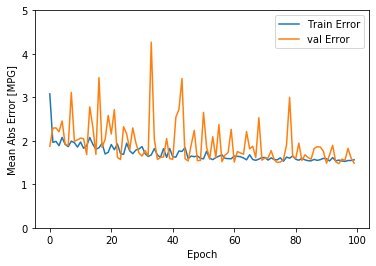

In [34]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch

plt.xlabel('Epoch')
plt.ylabel('Mean Abs Error [MPG]')
plt.plot(hist['epoch'], hist['mae'], label='Train Error')
plt.plot(hist['epoch'], hist['val_mae'], label='val Error')
plt.ylim(0, 5)
plt.legend()

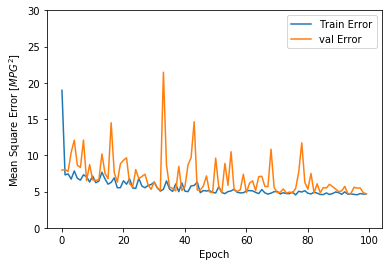

In [35]:
plt.xlabel('Epoch')
plt.ylabel('Mean Square Error [$MPG^2$]')
plt.plot(hist['epoch'], hist['mse'], label='Train Error')
plt.plot(hist['epoch'], hist['val_mse'], label='val Error')
plt.ylim(0, 30)
plt.legend()

In [29]:
loss, mae, mse = model.evaluate(X_test, y_test)
mse**0.5

836/836 [==============================] - 0s 41us/sample - loss: 4.8312 - mae: 1.5924 - mse: 4.8312


2.197990440347864

## model_3 add layers

In [36]:
model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=[8]),
    layers.Dense(128, activation='relu'),
    layers.Dense(256, activation='relu'),
    layers.Flatten(),
    layers.Dense(1)
])

In [37]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 64)                576       
_________________________________________________________________
dense_13 (Dense)             (None, 128)               8320      
_________________________________________________________________
dense_14 (Dense)             (None, 256)               33024     
_________________________________________________________________
flatten_1 (Flatten)          (None, 256)               0         
_________________________________________________________________
dense_15 (Dense)             (None, 1)                 257       
Total params: 42,177
Trainable params: 42,177
Non-trainable params: 0
_________________________________________________________________


In [38]:
model.compile(optimizer='adam', loss='mse', metrics=['mae', 'mse'])

In [39]:
history = model.fit(X_train, y_train, 
                     epochs=100,
                     batch_size=128,
                     validation_data=(X_test, y_test),
                     verbose = 1
                    )

Train on 3341 samples, validate on 836 samples
Epoch 1/100
3341/3341 [==============================] - 0s 65us/sample - loss: 64.4274 - mae: 7.0014 - mse: 64.4274 - val_loss: 16.2093 - val_mae: 3.2851 - val_mse: 16.2093
Epoch 2/100
3341/3341 [==============================] - 0s 28us/sample - loss: 12.1196 - mae: 2.6838 - mse: 12.1196 - val_loss: 9.1314 - val_mae: 2.1077 - val_mse: 9.1314
Epoch 3/100
3341/3341 [==============================] - 0s 33us/sample - loss: 8.5318 - mae: 2.1312 - mse: 8.5318 - val_loss: 7.7922 - val_mae: 1.9477 - val_mse: 7.7922
Epoch 4/100
3341/3341 [==============================] - 0s 29us/sample - loss: 7.3377 - mae: 1.9605 - mse: 7.3377 - val_loss: 6.8776 - val_mae: 1.8893 - val_mse: 6.8776
Epoch 5/100
3341/3341 [==============================] - 0s 31us/sample - loss: 6.5322 - mae: 1.8506 - mse: 6.5322 - val_loss: 6.2992 - val_mae: 1.7820 - val_mse: 6.2992
Epoch 6/100
3341/3341 [==============================] - 0s 28us/sample - loss: 6.0948 - mae: 1.7

Epoch 48/100
3341/3341 [==============================] - 0s 21us/sample - loss: 4.3815 - mae: 1.5012 - mse: 4.3815 - val_loss: 4.6242 - val_mae: 1.4724 - val_mse: 4.6242
Epoch 49/100
3341/3341 [==============================] - 0s 20us/sample - loss: 4.3401 - mae: 1.4860 - mse: 4.3401 - val_loss: 4.7508 - val_mae: 1.5860 - val_mse: 4.7508
Epoch 50/100
3341/3341 [==============================] - 0s 19us/sample - loss: 4.4813 - mae: 1.5441 - mse: 4.4813 - val_loss: 4.5889 - val_mae: 1.4664 - val_mse: 4.5889
Epoch 51/100
3341/3341 [==============================] - 0s 19us/sample - loss: 4.3957 - mae: 1.5025 - mse: 4.3957 - val_loss: 4.7680 - val_mae: 1.4778 - val_mse: 4.7680
Epoch 52/100
3341/3341 [==============================] - 0s 21us/sample - loss: 4.3764 - mae: 1.4930 - mse: 4.3764 - val_loss: 4.5915 - val_mae: 1.4742 - val_mse: 4.5915
Epoch 53/100
3341/3341 [==============================] - 0s 20us/sample - loss: 4.3163 - mae: 1.4830 - mse: 4.3163 - val_loss: 4.5632 - val_mae:

Epoch 96/100
3341/3341 [==============================] - 0s 23us/sample - loss: 4.2417 - mae: 1.4714 - mse: 4.2417 - val_loss: 4.5000 - val_mae: 1.4560 - val_mse: 4.5000
Epoch 97/100
3341/3341 [==============================] - 0s 21us/sample - loss: 4.2332 - mae: 1.4667 - mse: 4.2332 - val_loss: 4.4953 - val_mae: 1.4695 - val_mse: 4.4953
Epoch 98/100
3341/3341 [==============================] - 0s 23us/sample - loss: 4.2375 - mae: 1.4705 - mse: 4.2375 - val_loss: 4.5814 - val_mae: 1.4556 - val_mse: 4.5814
Epoch 99/100
3341/3341 [==============================] - 0s 23us/sample - loss: 4.2287 - mae: 1.4629 - mse: 4.2287 - val_loss: 4.6760 - val_mae: 1.5672 - val_mse: 4.6760
Epoch 100/100
3341/3341 [==============================] - 0s 23us/sample - loss: 4.3458 - mae: 1.4958 - mse: 4.3458 - val_loss: 4.7262 - val_mae: 1.4613 - val_mse: 4.7262


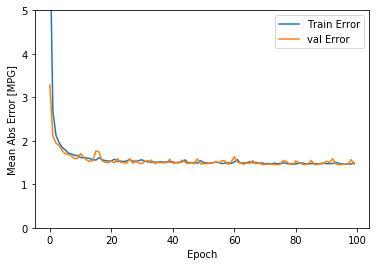

In [40]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch

plt.xlabel('Epoch')
plt.ylabel('Mean Abs Error [MPG]')
plt.plot(hist['epoch'], hist['mae'], label='Train Error')
plt.plot(hist['epoch'], hist['val_mae'], label='val Error')
plt.ylim(0, 5)
plt.legend()

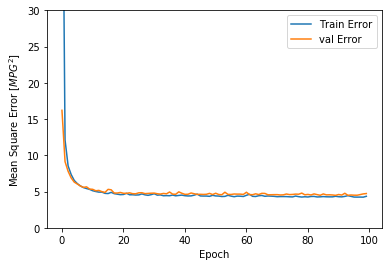

In [41]:
plt.xlabel('Epoch')
plt.ylabel('Mean Square Error [$MPG^2$]')
plt.plot(hist['epoch'], hist['mse'], label='Train Error')
plt.plot(hist['epoch'], hist['val_mse'], label='val Error')
plt.ylim(0, 30)
plt.legend()

In [42]:
score = model.evaluate(X_test, y_test)
score

836/836 [==============================] - 0s 48us/sample - loss: 4.7262 - mae: 1.4613 - mse: 4.7262


[4.7262160994789815, 1.4613353, 4.7262163]

## model_4 data one hot encoding

### data one-hot encoding

In [64]:
column_name = ["Sex", "Length" ,"Diameter" ,"Height" ,"WholeWeight" ,"ShuckedWeight", "VisceraWeight", "Shell weight", "Rings"]

In [65]:
data = pd.read_csv('abalone.data', names = column_name)
data.head()

,Sex,Length,Diameter,Height,WholeWeight,ShuckedWeight,VisceraWeight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [66]:
from sklearn.preprocessing import OneHotEncoder

In [67]:
encoder = OneHotEncoder()
data_sex_1hot = encoder.fit_transform(data_sex_encoded.reshape(-1, 1))

In [74]:
data_one = pd.get_dummies(data)
data = data_one
data

,Length,Diameter,Height,WholeWeight,ShuckedWeight,VisceraWeight,Shell weight,Rings,Sex_F,Sex_I,Sex_M
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15,0,0,1
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7,0,0,1
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9,1,0,0
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10,0,0,1
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
4172,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11,1,0,0
4173,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10,0,0,1
4174,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9,0,0,1
4175,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10,1,0,0


## data

In [75]:
X = data.copy()
y = X.pop('Rings')

In [76]:
print(X.shape, y.shape)

(4177, 10) (4177,)


## data split

In [77]:
from sklearn.model_selection import train_test_split

In [78]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [79]:
print(f"X_train : {X_train.shape}, y_train : {y_train.shape}")
print(f"X_test : {X_test.shape}, y_test : {y_test.shape}")

X_train : (3341, 10), y_train : (3341,)
X_test : (836, 10), y_test : (836,)


# model base optimizer adam data one_hot_encoding

In [80]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [81]:
model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=[10]),
    layers.Dense(128, activation='relu'),
    layers.Flatten(),
    layers.Dense(1)
])

In [82]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 64)                704       
_________________________________________________________________
dense_10 (Dense)             (None, 128)               8320      
_________________________________________________________________
flatten_3 (Flatten)          (None, 128)               0         
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 129       
Total params: 9,153
Trainable params: 9,153
Non-trainable params: 0
_________________________________________________________________


In [83]:
model.compile(optimizer='adam', loss='mse', metrics=['mae', 'mse'])

In [84]:
history = model.fit(X_train, y_train, 
                     epochs=100,
                     batch_size=128,
                     validation_data=(X_test, y_test),
                     verbose = 1
                    )

Train on 3341 samples, validate on 836 samples
Epoch 1/100
3341/3341 [==============================] - 0s 52us/sample - loss: 89.6712 - mae: 8.9118 - mse: 89.6712 - val_loss: 60.5397 - val_mae: 7.1414 - val_mse: 60.5397
Epoch 2/100
3341/3341 [==============================] - 0s 18us/sample - loss: 30.8553 - mae: 4.4400 - mse: 30.8553 - val_loss: 7.9635 - val_mae: 1.9810 - val_mse: 7.9635
Epoch 3/100
3341/3341 [==============================] - 0s 18us/sample - loss: 8.2639 - mae: 2.2147 - mse: 8.2639 - val_loss: 7.5624 - val_mae: 1.9015 - val_mse: 7.5624
Epoch 4/100
3341/3341 [==============================] - 0s 21us/sample - loss: 7.3504 - mae: 1.9491 - mse: 7.3504 - val_loss: 7.1899 - val_mae: 1.9129 - val_mse: 7.1899
Epoch 5/100
3341/3341 [==============================] - 0s 23us/sample - loss: 7.1469 - mae: 1.9522 - mse: 7.1469 - val_loss: 7.1171 - val_mae: 1.8486 - val_mse: 7.1171
Epoch 6/100
3341/3341 [==============================] - 0s 21us/sample - loss: 6.9815 - mae: 1.9

Epoch 48/100
3341/3341 [==============================] - 0s 17us/sample - loss: 4.5660 - mae: 1.5265 - mse: 4.5660 - val_loss: 4.7647 - val_mae: 1.5255 - val_mse: 4.7647
Epoch 49/100
3341/3341 [==============================] - 0s 15us/sample - loss: 4.5353 - mae: 1.5156 - mse: 4.5353 - val_loss: 4.7621 - val_mae: 1.5234 - val_mse: 4.7621
Epoch 50/100
3341/3341 [==============================] - 0s 15us/sample - loss: 4.5670 - mae: 1.5351 - mse: 4.5670 - val_loss: 4.7593 - val_mae: 1.4998 - val_mse: 4.7593
Epoch 51/100
3341/3341 [==============================] - 0s 15us/sample - loss: 4.5644 - mae: 1.5213 - mse: 4.5644 - val_loss: 4.7466 - val_mae: 1.5084 - val_mse: 4.7466
Epoch 52/100
3341/3341 [==============================] - 0s 16us/sample - loss: 4.5175 - mae: 1.5109 - mse: 4.5175 - val_loss: 4.7721 - val_mae: 1.4938 - val_mse: 4.7721
Epoch 53/100
3341/3341 [==============================] - 0s 16us/sample - loss: 4.5204 - mae: 1.5193 - mse: 4.5204 - val_loss: 4.7592 - val_mae:

Epoch 96/100
3341/3341 [==============================] - 0s 17us/sample - loss: 4.3735 - mae: 1.4918 - mse: 4.3735 - val_loss: 4.5924 - val_mae: 1.5095 - val_mse: 4.5924
Epoch 97/100
3341/3341 [==============================] - 0s 18us/sample - loss: 4.3645 - mae: 1.4925 - mse: 4.3645 - val_loss: 4.6095 - val_mae: 1.4817 - val_mse: 4.6095
Epoch 98/100
3341/3341 [==============================] - 0s 24us/sample - loss: 4.3632 - mae: 1.4957 - mse: 4.3632 - val_loss: 5.0694 - val_mae: 1.5146 - val_mse: 5.0694
Epoch 99/100
3341/3341 [==============================] - 0s 17us/sample - loss: 4.6526 - mae: 1.5432 - mse: 4.6526 - val_loss: 4.6066 - val_mae: 1.4890 - val_mse: 4.6066
Epoch 100/100
3341/3341 [==============================] - 0s 19us/sample - loss: 4.3561 - mae: 1.4870 - mse: 4.3561 - val_loss: 4.6452 - val_mae: 1.5346 - val_mse: 4.6452


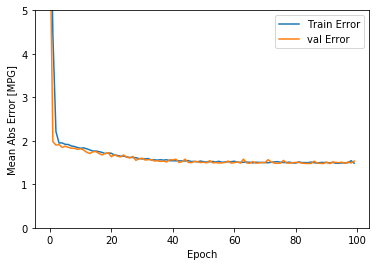

In [85]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch

plt.xlabel('Epoch')
plt.ylabel('Mean Abs Error [MPG]')
plt.plot(hist['epoch'], hist['mae'], label='Train Error')
plt.plot(hist['epoch'], hist['val_mae'], label='val Error')
plt.ylim(0, 5)
plt.legend()

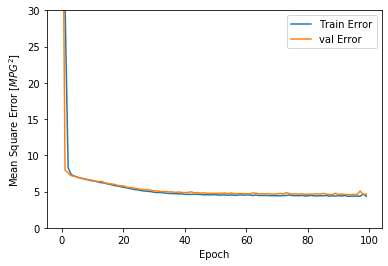

In [86]:
plt.xlabel('Epoch')
plt.ylabel('Mean Square Error [$MPG^2$]')
plt.plot(hist['epoch'], hist['mse'], label='Train Error')
plt.plot(hist['epoch'], hist['val_mse'], label='val Error')
plt.ylim(0, 30)
plt.legend()

In [87]:
loss, mae, mse = model.evaluate(X_test, y_test)
mse**0.5

836/836 [==============================] - 0s 36us/sample - loss: 4.6452 - mae: 1.5346 - mse: 4.6452


2.155264145313